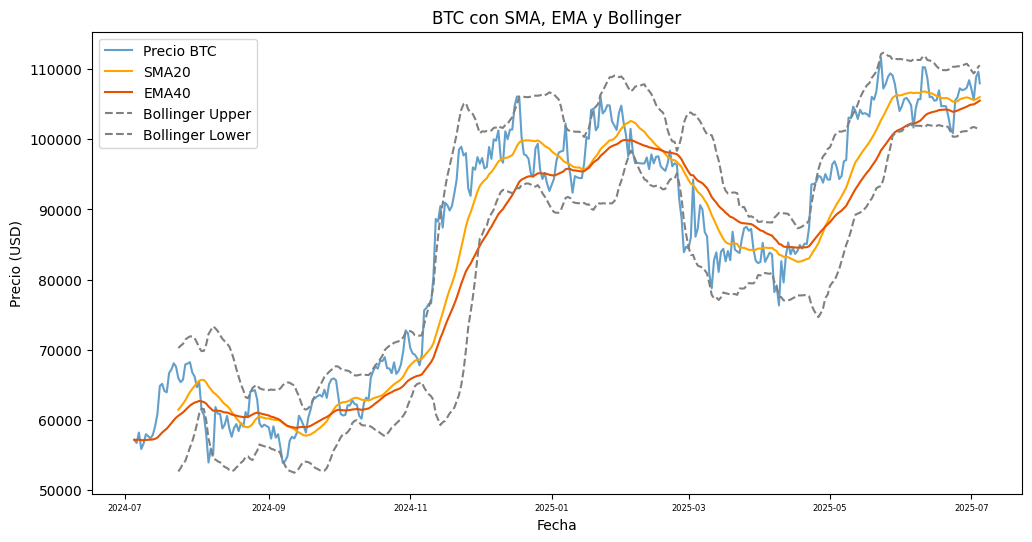

In [7]:
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import sys

# Pongo el path correcto al modulo 
sys.path.append('../../scripts')
from plotUtils import plotBtcPrice, addSMA, addEMA, addBollinger

# Descargo datos de BTC (365 dias)
url = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart'
params = {'vs_currency': 'usd', 'days': '365'}
response = requests.get(url, params=params).json()

# Organizo los datos recibidos en un DataFrame
prices = pd.DataFrame(response['prices'], columns=['timestamp', 'price'])
prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit='ms')

# Creo el canvas para todo el plot
plt.figure(figsize=(12,6))  

# Graficar y anyadir indicadores
plt.plot(prices['timestamp'], prices['price'], label='Precio BTC', alpha=0.7)

addSMA(prices, 20, color='orange')
addEMA(prices, 40, color='#e65100')
addBollinger(prices, window=20, num_std=2)

plt.title('BTC con SMA, EMA y Bollinger')
plt.xlabel('Fecha')
plt.xticks(fontsize=6)
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()